Set Environment

YOLOV8 Setup Configuraitons

In [ ]:
from PIL import Image
!pip install ultralytics
from ultralytics import YOLO
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
# Path to your image
all_images_path = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_all_images"



# Load the pre-trained YOLOv8 model - our YOLOV8 train Model
#model = YOLO("/content/drive/My Drive/Colab Notebooks/YOLOV8 Photos/runs/detect/train/weights/best.pt")

# Yolo World - better True Positive ccuracy
model = YOLO("yolov8s-world.pt") # YOLO WOrld
model.set_classes(["Coffee_cup"])

# Perform object detection on the image
results = model.predict(all_images_path, show=True)

# Display the results

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

100%|██████████| 25.9M/25.9M [00:00<00:00, 168MB/s] 


requirements: Ultralytics requirement ['git+https://github.com/ultralytics/CLIP.git'] not found, attempting AutoUpdate...
  Cloning https://github.com/ultralytics/CLIP.git to /tmp/pip-req-build-vfgp22qw
  Resolved https://github.com/ultralytics/CLIP.git to commit e17416a36b45d040758327936a1ea150c13fe3d1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 877.9 kB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369504 sha256=0d102067344da785b5c26f60fa75bbb23ad520505b8299c4e7b9203ee4865942
  Stored in directory: /tmp/pip-ephem-wheel-cache-gtuc7fwt/wheels/2e/25/92/e26f2a227599930e19a8188891e9600b6dd36721a0f8d6ef40
Successfully built clip

requirements: AutoUpdate success ✅ 11.6s, installed 1 package: ['git+https://github.com/ultralytics/CLIP.git']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 200MiB/s]


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/9896 /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_all_images/coffe_image(1).jpg: 640x640 1 Coffee_cup, 920.0ms
image 2/9896 /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_all_images/coffe_image(1)_augmented_1.jpg: 640x640 1 Coffee_cup, 1031.7ms
image 3/9896 /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_all_

KeyboardInterrupt: 

Parse csv file

In [ ]:
import pandas as pd

# Load the CSV file
csv_file_path = '/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_final_type_of_coffee.csv'

labels_df = pd.read_csv(csv_file_path)

# Define a function to get the class ID based on the columns
def get_class_id(row):
    if row['cappuccino'] == 1:
        return 0
    elif row['espresso'] == 1:
        return 1
    elif row['black'] == 1:
        return 2
    else:
        return -1  # Invalid class

# Apply the function to get the class ID for each image
labels_df['class_id'] = labels_df.apply(get_class_id, axis=1)

Generate Annotations

In [ ]:
import os
from ultralytics import YOLO
import time


# Path to your image folder
image_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_all_images"
output_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/annotations"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)
# Apply the function to get the class ID for each image
labels_df['class_id'] = labels_df.apply(get_class_id, axis=1)

# Filter out invalid classes
labels_df = labels_df[labels_df['class_id'] != -1]

# Filter out images that do not exist in the specified folder
labels_df['image_exists'] = labels_df['image_name'].apply(lambda x: os.path.isfile(os.path.join(image_folder, x)))
labels_df = labels_df[labels_df['image_exists']]

# Drop the helper column
labels_df = labels_df.drop(columns=['image_exists'])

# Create output folder if it doesn't exist
output_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/annotations"
os.makedirs(output_folder, exist_ok=True)

# Loop through each image and create annotations
for index, row in labels_df.iterrows():
    image_name = row['image_name']
    class_id = row['class_id']
    image_path = os.path.join(image_folder, image_name)

    before = time.time()
    # Perform object detection on the image
    results = model.predict(image_path, device='cpu', save=False)
    after = time.time()

    print(f"Processed {image_name} in {after - before} seconds")

    # Skip images where no coffee cups are detected
    if len(results[0].boxes) == 0:
        print(f"No coffee cup detected in {image_name}. Skipping.")
        continue

    # Save annotations
    annotation_path = os.path.join(output_folder, os.path.splitext(image_name)[0] + '.txt')
    with open(annotation_path, 'w') as f:
        for result in results[0].boxes:
            bbox = result.xyxy[0]  # xyxy format: (x_min, y_min, x_max, y_max)
            f.write(f"{class_id} {bbox[0].item()} {bbox[1].item()} {bbox[2].item()} {bbox[3].item()}\n")

print("Annotations saved to", output_folder)

Streaming output truncated to the last 5000 lines.
image 1/1 /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_all_images/coffe_image(154)_augmented_10.jpg: 640x640 (no detections), 815.2ms
Speed: 3.6ms preprocess, 815.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Processed coffe_image(154)_augmented_10.jpg in 1.1760764122009277 seconds
No coffee cup detected in coffe_image(154)_augmented_10.jpg. Skipping.

image 1/1 /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_all_images/coffe_image(674)_augmented_8.jpg: 640x640 1 Coffee_cup, 829.6ms
Speed: 4.0ms preprocess, 829.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Processed coffe_image(674)_augmented_8.jpg in 1.2456021308898926 seconds

image 1/1 /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_all_images/coffe_image(53)_augmented_1.jpg: 640x640 1 Coffee_cup, 812.7ms
Speed: 4.0ms preprocess, 812.7ms inference, 1.1ms postprocess per image

Sample the data:

Class: 0


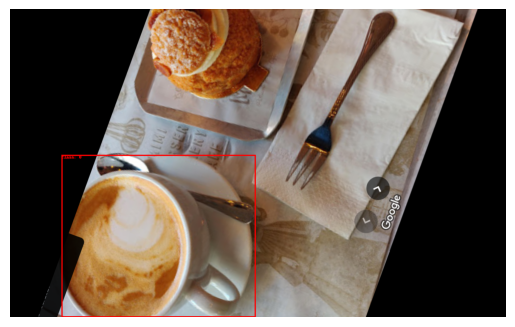

Image: image_050_augmented_8.PNG


In [ ]:
from PIL import Image, ImageDraw, ImageFont
import random
import matplotlib.pyplot as plt

# Function to draw bounding boxes on an image
def draw_bounding_boxes(image_path, annotation_path):
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)

    # Load annotations
    with open(annotation_path, 'r') as f:
        lines = f.readlines()



    # Draw each bounding box
    for line in lines:
        class_id, x_min, y_min, x_max, y_max = map(float, line.strip().split())
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)
        print(f"Class: {int(class_id)}")
        draw.text((x_min, y_min), f"Class: {int(class_id)}", fill="red")

    return image

# Get a random image from the dataset
def show_random_image_with_annotations(image_folder, annotation_folder):
    images = os.listdir(image_folder)
    random_image = random.choice(images)
    image_path = os.path.join(image_folder, random_image)
    annotation_path = os.path.join(annotation_folder, os.path.splitext(random_image)[0] + '.txt')

    if os.path.exists(annotation_path):
        annotated_image = draw_bounding_boxes(image_path, annotation_path)
        plt.imshow(annotated_image)
        plt.axis('off')
        plt.show()
        print(f"Image: {random_image}")
    else:
        print(f"No annotations found for image: {random_image}")

# Paths
image_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_all_images"
annotation_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/annotations"

# Show a random image with annotations
show_random_image_with_annotations(image_folder, annotation_folder)

Prepare Data

In [ ]:


import os
import shutil

# Paths
image_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_all_images"
annotation_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/annotations"
filtered_image_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/filtered_images"


# Create new folders if they don't exist
os.makedirs(filtered_image_folder, exist_ok=True)


count = 0
errors = 0
# Loop through each image in the original image folder
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    annotation_path = os.path.join(annotation_folder, os.path.splitext(image_name)[0] + '.txt')
    try:
      if os.path.exists(annotation_path):
          # Copy the image to the filtered images folder
          shutil.copy(image_path, filtered_image_folder)
      else:
          count += 1
    except Exception as e:
      print(f"Error processing {image_name}: {e}")
      errors += 1


print("Filtered images  saved.")
print("number of photos who not copied ", count)
print("number of errors ", errors)




Filtered images  saved.
number of photos who not copied  1887
number of errors  0


Statistics

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

# Paths
filtered_annotation_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/annotations"

# Initialize counters
coffee_counts = {'cappuccino': 0, 'espresso': 0, 'black': 0}

# Class IDs as defined earlier
class_mapping = {0: 'cappuccino', 1: 'espresso', 2: 'black'}

# Process each annotation file
annotation_files = [f for f in os.listdir(filtered_annotation_folder) if f.endswith('.txt')]

print("files: " ,len(annotation_files))

for annotation_file in tqdm(annotation_files, desc="Processing annotation files"):
    annotation_path = os.path.join(filtered_annotation_folder, annotation_file)

    with open(annotation_path, 'r') as f:
        line = f.readline().strip()  # Read the first line and strip any extra whitespace

        if line:
            class_id = int(line.split()[0])  # Get the class ID (first element in the line)
            class_name = class_mapping.get(class_id, 'unknown')

            if class_name in coffee_counts:
                coffee_counts[class_name] += 1

# Print the statistics
print("Statistics of Coffee Types:")
for coffee_type, count in coffee_counts.items():
    print(f"{coffee_type.capitalize()}: {count}")


files:  8009


Processing annotation files:   1%|          | 87/8009 [01:25<2:09:27,  1.02it/s]


KeyboardInterrupt: 

Cappuccino: 1803
Espresso: 2530
Black: 3676

Split Dataset

 Organize Directory Structure

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Paths
image_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/filtered_images"
annotation_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/annotations"

# Output folders
output_base_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/Dataset"
train_image_folder = os.path.join(output_base_folder, 'train/images')
train_annotation_folder = os.path.join(output_base_folder, 'train/annotations')
val_image_folder = os.path.join(output_base_folder, 'val/images')
val_annotation_folder = os.path.join(output_base_folder, 'val/annotations')
test_image_folder = os.path.join(output_base_folder, 'test/images')
test_annotation_folder = os.path.join(output_base_folder, 'test/annotations')

# Create output folders if they don't exist
for folder in [train_image_folder, train_annotation_folder, val_image_folder, val_annotation_folder, test_image_folder, test_annotation_folder]:
    os.makedirs(folder, exist_ok=True)

# List all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Split the dataset into training, validation, and test sets
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=42)

def copy_files(files, src_image_folder, src_annotation_folder, dest_image_folder, dest_annotation_folder):
    for image_file in files:
        annotation_file = os.path.splitext(image_file)[0] + '.txt'
        # Source paths
        src_image_path = os.path.join(src_image_folder, image_file)
        src_annotation_path = os.path.join(src_annotation_folder, annotation_file)
        # Destination paths
        dest_image_path = os.path.join(dest_image_folder, image_file)
        dest_annotation_path = os.path.join(dest_annotation_folder, annotation_file)

        # Copy image file
        shutil.copy(src_image_path, dest_image_path)

        # Copy annotation file if it exists
        if os.path.exists(src_annotation_path):
            shutil.copy(src_annotation_path, dest_annotation_path)
        else:
            print(f"Warning: Annotation file {annotation_file} does not exist.")

# Copy files to the respective folders
copy_files(train_files, image_folder, annotation_folder, train_image_folder, train_annotation_folder)
copy_files(val_files, image_folder, annotation_folder, val_image_folder, val_annotation_folder)
copy_files(test_files, image_folder, annotation_folder, test_image_folder, test_annotation_folder)

print("Data has been split and organized into train, validation, and test folders.")


Data has been split and organized into train, validation, and test folders.


Fit all images to be 224X224

In [ ]:
from PIL import Image
import os

# Function to resize images
def resize_image(image_path, output_path, target_size=(224, 224)):
    with Image.open(image_path) as img:
        img_resized = img.resize(target_size)
        img_resized.save(output_path)

# Function to normalize bounding box coordinates
def normalize_coordinates(label_file, image_width, image_height):
    with open(label_file, 'r') as file:
        lines = file.readlines()

    normalized_lines = []
    for line in lines:
        parts = line.strip().split()
        class_id = parts[0]
        coords = [float(coord) for coord in parts[1:]]

        # Assuming the format is [class_id, x_center, y_center, width, height]
        x_center, y_center, width, height = coords

        # Check if coordinates are already normalized
        if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1:
            normalized_lines.append(line)
        else:
            # Normalize the coordinates
            x_center /= image_width
            y_center /= image_height
            width /= image_width
            height /= image_height

            # Ensure that the coordinates are now in the [0, 1] range
            if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1:
                normalized_line = f"{class_id} {x_center} {y_center} {width} {height}\n"
                normalized_lines.append(normalized_line)
            else:
                print(f"Skipping non-normalized or out of bounds coordinates in {label_file}: {line.strip()}")

    with open(label_file, 'w') as file:
        file.writelines(normalized_lines)

# Function to process all label files
def process_labels(labels_dir, image_width, image_height):
    for root, _, files in os.walk(labels_dir):
        for file in files:
            if file.endswith(".txt"):
                normalize_coordinates(os.path.join(root, file), image_width, image_height)

# Function to process all images and labels in the dataset directory
def process_dataset(dataset_dir, image_width=224, image_height=224):
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_path = os.path.join(root, file)
                resize_image(image_path, image_path, (image_width, image_height))
            elif file.endswith(".txt"):
                normalize_coordinates(os.path.join(root, file), image_width, image_height)

# Define the dataset directory
dataset_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/Dataset"

# Process all images and labels
process_dataset(f"{dataset_dir}/train", 224, 224)
process_dataset(f"{dataset_dir}/val", 224, 224)
process_dataset(f"{dataset_dir}/test", 224, 224)

print("All images have been resized and labels normalized.")

All images have been resized and labels normalized.


In [ ]:
# Function to count how many images are not 224x224
def count_non_standard_images(images_dir, standard_width=224, standard_height=224):
    non_standard_count = 0
    for root, _, files in os.walk(images_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    width, height = img.size
                    if width != standard_width or height != standard_height:
                        non_standard_count += 1
    return non_standard_count
dataset_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/Dataset"
# Count non-standard images in the dataset
train_images_dir = os.path.join(dataset_dir, "train/images")
val_images_dir = os.path.join(dataset_dir, "val/images")
test_images_dir = os.path.join(dataset_dir, "test/images")
non_standard_train = count_non_standard_images(train_images_dir)
non_standard_val = count_non_standard_images(val_images_dir)
non_standard_test = count_non_standard_images(test_images_dir)

print(f"Number of non-224x224 images in train set: {non_standard_train}")
print(f"Number of non-224x224 images in val set: {non_standard_val}")
print(f"Number of non-224x224 images in test set: {non_standard_test}")

Number of non-224x224 images in train set: 0
Number of non-224x224 images in val set: 0
Number of non-224x224 images in test set: 0


In [ ]:
import os
from concurrent.futures import ThreadPoolExecutor

# Function to normalize bounding box coordinates
count = 0
def normalize_coordinates(label_file, image_width, image_height):
    with open(label_file, 'r') as file:
        lines = file.readlines()

    normalized_lines = []
    for line in lines:
        parts = line.strip().split()
        class_id = parts[0]
        coords = [float(coord) for coord in parts[1:]]

        # Assuming the format is [class_id, x_center, y_center, width, height]
        x_center, y_center, width, height = coords
        print("Cords:", coords)
        # Check if coordinates are already normalized
        if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1:
            normalized_lines.append(line)
        else:
            # Normalize the coordinates
            x_center /= image_width
            y_center /= image_height
            width /= image_width
            height /= image_height
            count += 1
            print("Non normalized cords:", coords)
            # Ensure that the coordinates are now in the [0, 1] range
            if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1:
                normalized_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
                normalized_lines.append(normalized_line)
            else:
                print(f"Skipping non-normalized or out of bounds coordinates in {label_file}: {line.strip()}")

    with open(label_file, 'w') as file:
        file.writelines(normalized_lines)

# Function to process all labels in a specific directory
def process_labels_in_directory(labels_dir, image_width=224, image_height=224):
    for root, _, files in os.walk(labels_dir):
        for file in files:
            if file.endswith(".txt"):
                label_file_path = os.path.join(root, file)
                normalize_coordinates(label_file_path, image_width, image_height)

# Function to process the dataset labels in parallel
def process_dataset_labels_parallel(dataset_dir, image_width=224, image_height=224, max_workers=8):
    labels_dirs = [os.path.join(dataset_dir, "train/labels"),
                   os.path.join(dataset_dir, "val/labels"),
                   os.path.join(dataset_dir, "test/labels")]

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = [executor.submit(process_labels_in_directory, labels_dir, image_width, image_height)
                   for labels_dir in labels_dirs]

        # Wait for all futures to complete
        for future in futures:
            future.result()

# Define the dataset directory
dataset_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/Dataset"

# Process all label files in parallel
process_dataset_labels_parallel(dataset_dir, 224, 224)

print("All label files have been normalized.")
print(count)

Cords: [0.15377540247780935, 0.1869841984340123, 0.6005438395908901, 0.7127618789672852]
Cords: [0.10435933726174491, 0.07651042938232422, 0.7252415248325893, 0.6683704512459892]
Cords: [0.045077966792242866, 0.023814009768622264, 0.8263516426086426, 0.9976539611816406]
Cords: [0.24783730506896973, 0.4078911713191441, 0.6514615331377301, 0.9152862003871373]
Cords: [0.0, 0.042120550359998433, 0.9993728228977748, 0.542299747467041]
Cords: [0.013066816542829787, 0.014162825686591012, 0.7637321608407157, 0.9386316026960101]
Cords: [0.003219795280269214, 0.1241292953491211, 0.9505367279052734, 1.0]
Cords: [0.02463817596435547, 0.05008478249822344, 0.8423074313572475, 0.953902108328683]
Cords: [0.12764682088579452, 0.1303170153072902, 0.8416728973388672, 0.8911059243338448]
Cords: [0.1410842708178929, 0.15246844291687012, 0.5169860635484967, 0.6144129889351981]
Cords: [0.1654040813446045, 0.3430935655321394, 0.4859652519226074, 0.7106789180210659]
Cords: [0.5314882482801165, 0.20955581324441

KeyboardInterrupt: 

Cords: [0.14427098206111363, 0.25254840510232107, 0.7490260260445731, 0.9076685905456543]
Cords: [0.5144624710083008, 0.3428192138671875, 0.8351211547851562, 0.7097830772399902]
Cords: [0.30233635221208843, 0.209202664239066, 0.4690988063812256, 0.6479583467755999]
Cords: [0.10575584854398455, 0.13312544141496932, 0.742302417755127, 0.7829503331865583]


Train the model

In [19]:
!pip install ultralytics
from ultralytics import YOLO
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')
# Load the pre-trained YOLOv8 model with the coffee cup weights
model = YOLO("/content/drive/My Drive/Colab Notebooks/YOLOV8 Photos/yolov8n.pt")


# Define the path to save the trained model
save_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/runs"

# Fine-tune the model on the new dataset and save it to the specified directory
model.train(data='/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/config.yaml',
            epochs=30, imgsz=224, project=save_dir, name='finetune_run')

print("Model training completed and saved.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics YOLOv8.2.24 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/My Drive/Colab Notebooks/YOLOV8 Photos/yolov8n.pt, data=/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/config.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/runs, name=finetune_run6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half

100%|██████████| 755k/755k [00:00<00:00, 26.5MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/Dataset/train/labels.cache... 4659 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4659/4659 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/Dataset/val/labels.cache... 1165 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1165/1165 [00:00<?, ?it/s]


Plotting labels to /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/runs/finetune_run6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/runs/finetune_run6
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.812      2.627      1.934         10        224: 100%|██████████| 292/292 [11:14<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [07:48<00:00, 12.66s/it]

                   all       1165       1574      0.388       0.46      0.432       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.519      2.069       1.74         12        224: 100%|██████████| 292/292 [09:32<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:17<00:00,  2.09s/it]


                   all       1165       1574      0.549       0.49      0.476      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.484       1.96      1.711          8        224: 100%|██████████| 292/292 [09:34<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:15<00:00,  2.03s/it]


                   all       1165       1574      0.365      0.436      0.356      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.431      1.852      1.672         12        224: 100%|██████████| 292/292 [09:26<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:15<00:00,  2.03s/it]


                   all       1165       1574      0.493      0.428      0.435      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.381      1.779      1.648          6        224: 100%|██████████| 292/292 [09:25<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:15<00:00,  2.04s/it]

                   all       1165       1574      0.674      0.534      0.573      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.353      1.719      1.614         10        224: 100%|██████████| 292/292 [09:28<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:17<00:00,  2.08s/it]

                   all       1165       1574      0.645      0.537      0.555      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.316      1.646      1.587          6        224: 100%|██████████| 292/292 [09:26<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:14<00:00,  2.01s/it]

                   all       1165       1574      0.641       0.57      0.568      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.295      1.613      1.576          8        224: 100%|██████████| 292/292 [09:35<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:18<00:00,  2.11s/it]


                   all       1165       1574      0.636      0.557      0.585      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.282      1.574      1.562          6        224: 100%|██████████| 292/292 [09:44<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:14<00:00,  2.01s/it]

                   all       1165       1574      0.754       0.61      0.663      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.265      1.542      1.557         11        224: 100%|██████████| 292/292 [09:25<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:16<00:00,  2.07s/it]

                   all       1165       1574       0.64      0.529      0.542      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G       1.25      1.517      1.544          7        224: 100%|██████████| 292/292 [09:23<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:15<00:00,  2.05s/it]

                   all       1165       1574      0.808      0.606      0.684      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.233      1.476       1.53         10        224: 100%|██████████| 292/292 [09:24<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:13<00:00,  1.99s/it]

                   all       1165       1574      0.707        0.6      0.616      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.226      1.456      1.525         12        224: 100%|██████████| 292/292 [09:26<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:14<00:00,  2.02s/it]

                   all       1165       1574      0.748      0.603      0.667      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.206      1.425      1.509         12        224: 100%|██████████| 292/292 [09:24<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:15<00:00,  2.04s/it]

                   all       1165       1574      0.808       0.62      0.705       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.194      1.434      1.509          7        224: 100%|██████████| 292/292 [09:26<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:14<00:00,  2.02s/it]

                   all       1165       1574      0.769      0.611      0.668      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.168      1.361      1.487         12        224: 100%|██████████| 292/292 [09:27<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:13<00:00,  1.98s/it]

                   all       1165       1574      0.699       0.64      0.672      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.168      1.379      1.488         11        224: 100%|██████████| 292/292 [09:27<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:16<00:00,  2.06s/it]

                   all       1165       1574      0.672       0.61      0.646      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.148       1.34      1.469         11        224: 100%|██████████| 292/292 [09:30<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:15<00:00,  2.04s/it]

                   all       1165       1574       0.79      0.647      0.733      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.142      1.318      1.464         13        224: 100%|██████████| 292/292 [09:25<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:13<00:00,  2.00s/it]

                   all       1165       1574      0.739      0.633       0.67      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.124      1.294      1.458         12        224: 100%|██████████| 292/292 [09:23<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:13<00:00,  2.00s/it]

                   all       1165       1574      0.683      0.637      0.654      0.485


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.8876     0.9952      1.325          3        224: 100%|██████████| 292/292 [09:15<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:13<00:00,  1.98s/it]

                   all       1165       1574      0.734      0.663      0.728      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.8516     0.9085      1.302          3        224: 100%|██████████| 292/292 [09:15<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:14<00:00,  2.01s/it]

                   all       1165       1574      0.762      0.675      0.766      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.8375     0.8616       1.29          3        224: 100%|██████████| 292/292 [09:15<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:13<00:00,  1.99s/it]

                   all       1165       1574      0.719      0.709      0.731      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.8134     0.8342      1.275          4        224: 100%|██████████| 292/292 [09:15<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:13<00:00,  2.00s/it]

                   all       1165       1574      0.749      0.676      0.759      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.7964     0.8106       1.27          4        224: 100%|██████████| 292/292 [09:15<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:12<00:00,  1.96s/it]

                   all       1165       1574      0.761       0.68       0.76      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7743     0.7742      1.255          4        224: 100%|██████████| 292/292 [09:16<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:14<00:00,  2.02s/it]

                   all       1165       1574      0.757      0.719      0.785      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.7612     0.7526      1.248          5        224: 100%|██████████| 292/292 [09:22<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:12<00:00,  1.96s/it]

                   all       1165       1574      0.774      0.708      0.791      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.7439     0.7471      1.237          3        224: 100%|██████████| 292/292 [09:17<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:12<00:00,  1.97s/it]

                   all       1165       1574       0.79      0.722      0.802      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      0.721     0.7273      1.224          3        224: 100%|██████████| 292/292 [09:19<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:11<00:00,  1.94s/it]

                   all       1165       1574      0.774      0.718      0.792      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.7174     0.7071      1.221          4        224: 100%|██████████| 292/292 [09:17<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:14<00:00,  2.01s/it]

                   all       1165       1574        0.8      0.721      0.809      0.647



30 epochs completed in 5.476 hours.
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/runs/finetune_run6/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/runs/finetune_run6/weights/best.pt, 6.2MB

Validating /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/runs/finetune_run6/weights/best.pt...
Ultralytics YOLOv8.2.24 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:09<00:00,  1.88s/it]


                   all       1165       1574        0.8      0.721      0.809      0.646
            Cappuccino       1165        315       0.77       0.67      0.767      0.572
              Espresso       1165        545      0.807       0.75      0.844      0.692
                 Black       1165        714      0.822      0.742      0.815      0.675
Speed: 1.4ms preprocess, 45.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/runs/finetune_run6
Model training completed and saved.


Predict on New Image

In [2]:
!pip install ultralytics
from ultralytics import YOLO
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 5.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

Streaming output truncated to the last 5000 lines.
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
orig_shape: (224, 224)
path: '/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/Dataset/test/images/coffe_image(293)_augmented_

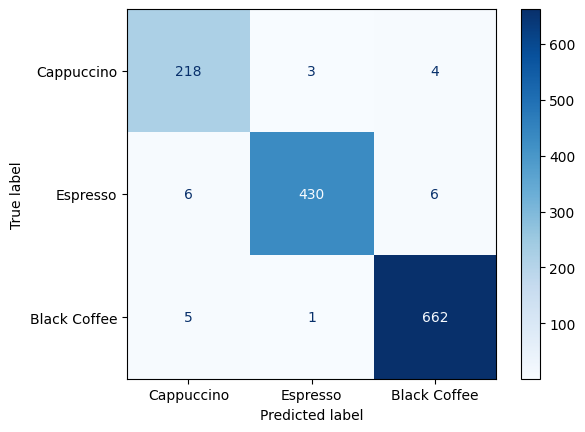

In [3]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ultralytics import YOLO  # Assuming the YOLO library is correctly installed

# Paths to your dataset and model
images_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/Dataset/test/images/"
labels_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/Dataset/test/labels/"
model_path = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/runs/finetune_run6/weights/best.pt"

# Load the model
model = YOLO(model_path)

# Class labels
class_labels = ['Cappuccino', 'Espresso', 'Black Coffee']

# Initialize lists to hold true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the images in the test folder
for image_path in glob.glob(os.path.join(images_folder, "*.jpg")):
    # Get the corresponding label file
    label_file = os.path.join(labels_folder, os.path.basename(image_path).replace(".jpg", ".txt"))

    # Read the true label
    with open(label_file, 'r') as file:
        true_class_id = int(file.readline().strip().split()[0])
        true_labels.append(true_class_id)

    # Perform prediction
    results = model.predict(image_path, device='cpu', conf=0.5)

    # Extract the predicted class with the highest confidence
    if len(results) > 0 and len(results[0].boxes) > 0:
        print(results)
        predicted_class_id = int(results[0].boxes[0].cls)
    else:
        predicted_class_id = -1  # If no prediction is made, assign an invalid class ID

    predicted_labels.append(predicted_class_id)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Evaluate Model

In [ ]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('path/to/your/trained/model.pt')
# Evaluate the model
metrics = model.val(data='path/to/your/dataset.yaml')

# Print the evaluation metrics
print(metrics)

Calculate Confusion Matrix

In [ ]:
import numpy as np
import os
import cv2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths to validation images and labels
val_images_path = 'dataset/images/val'
val_labels_path = 'dataset/labels/val'

# Load the validation dataset
val_dataset = YOLO(val_images_path)

# Lists to store true and predicted labels
true_labels = []
pred_labels = []

# Loop through validation images and labels
for image_name in os.listdir(val_images_path):
    if image_name.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(val_images_path, image_name)
        label_path = os.path.join(val_labels_path, os.path.splitext(image_name)[0] + '.txt')

        # Load the image
        image = cv2.imread(image_path)

        # Perform inference
        results = model.predict(image_path, device='cpu')

        # Read the true labels
        with open(label_path, 'r') as f:
            for line in f.readlines():
                class_id = int(line.split()[0])
                true_labels.append(class_id)

        # Read the predicted labels
        for result in results[0].boxes:
            pred_labels.append(result.cls)

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels, labels=[0, 1, 2])
cmd = ConfusionMatrixDisplay(cm, display_labels=['Cappuccino', 'Black Coffee', 'Espresso'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Compute Accuracy, Precision, and Recall

In [ ]:
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(true_labels, pred_labels, target_names=['Cappuccino', 'Black Coffee', 'Espresso'])
print(report)